### Importing eia module

In [10]:
import eia

In [29]:
import numpy as np

In [11]:
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg

In [12]:
import warnings

warnings.filterwarnings("ignore")

### Loading data using the eia.loaders.load_dataframe method

We will analyze 'electric-power-operational-data' and try to find some interesting insights.

In [13]:
df = eia.loaders.load_dataframe(data="electric-power-operational-data")

/Users/priyanshbhatnagar/data/eia-py/data/csv/electric-power-operational-data_data.csv


In [14]:
df.head()

,Unnamed: 0,period,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription,generation,generation-units,...,cost,cost-units,cost-per-btu,cost-per-btu-units,sulfur-content,sulfur-content-units,ash-content,ash-content-units,heat-content,heat-content-units
0,0,2021-06,SD,South Dakota,98,Electric Power,AOR,all renewables,660.11939,thousand megawatthours,...,NaN,dollars per physical units,NaN,dollars per million Btu,0.00,percent,0.0,percent,0.000,Btu per physical units
1,1,2021-06,SD,South Dakota,98,Electric Power,BIO,biomass,0.00000,thousand megawatthours,...,NaN,dollars per physical units,NaN,dollars per million Btu,0.00,percent,0.0,percent,0.000,Btu per physical units
2,2,2021-06,SD,South Dakota,98,Electric Power,COL,"coal, excluding waste coal",205.22798,thousand megawatthours,...,NaN,dollars per short tons,NaN,dollars per million Btu,0.84,percent,5.2,percent,16.402,Btu per short tons
3,3,2021-06,SD,South Dakota,98,Electric Power,COW,all coal products,205.22798,thousand megawatthours,...,30.02,dollars per short tons,1.825,dollars per million Btu,0.84,percent,5.2,percent,16.402,Btu per short tons
4,4,2021-06,SD,South Dakota,98,Electric Power,DFO,distillate fuel oil,NaN,thousand megawatthours,...,NaN,dollars per short tons,NaN,dollars per million Btu,0.00,percent,0.0,percent,6.000,Btu per short tons


In [15]:
len(df)

5000

In [16]:
df["period"].unique()

array(['2021-06', '2021-07', '2021-08', '2021-09', '2022-02', '2022-03',
       '2022-04', '2021-10', '2021-11', '2021-12', '2022-01', '2021-05',
       '2021-04', '2022-05', '2010-03', '2010-01', '2010-02'],
      dtype=object)

In [45]:
states_generation = {}
for i in range(0, 5000):
    if (
        df["sectorDescription"][i] == "Electric Power"
        and df["fuelTypeDescription"][i] == "all renewables"
    ):
        states_generation[df["location"][i]] = df["generation"][i]

In [46]:
states_generation

{'SD': 777.64297,
 'CO': 1486.04431,
 'MTN': 5502.82573,
 'WA': 591.21657,
 'TX': 8791.92861,
 'PCC': 6800.40767,
 'CA': 5102.63562,
 'AL': 55.57365,
 'PR': 26.8152,
 'AR': 43.73692,
 'IN': 704.29153,
 'PCN': 140.81661,
 'TN': 39.36849,
 'KS': 2143.10626,
 'RI': 59.83523}

<BarContainer object of 15 artists>

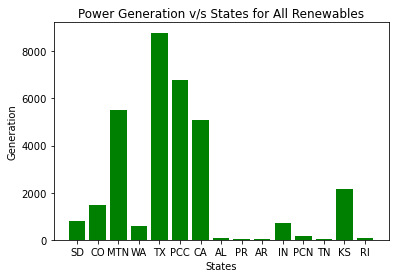

In [47]:
import matplotlib.pyplot as plt

plt.xlabel("States")
plt.ylabel("Generation")
plt.title("Power Generation v/s States for All Renewables")
plt.bar(states_generation.keys(), states_generation.values(), color="g")

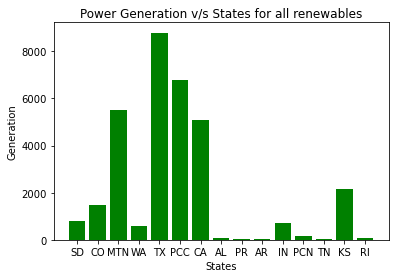

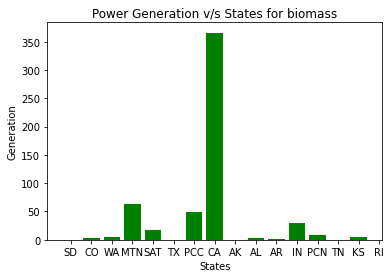

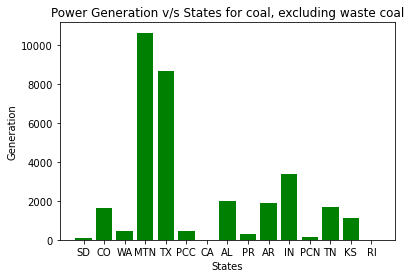

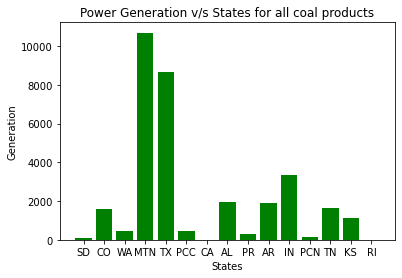

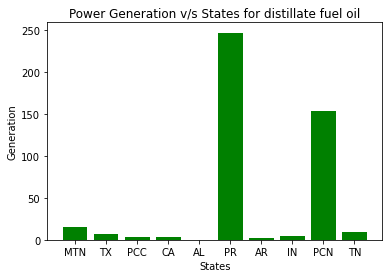

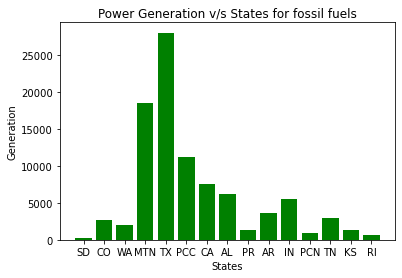

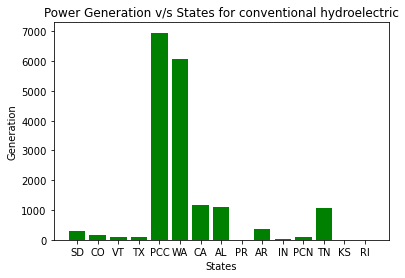

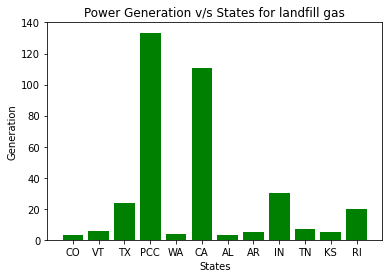

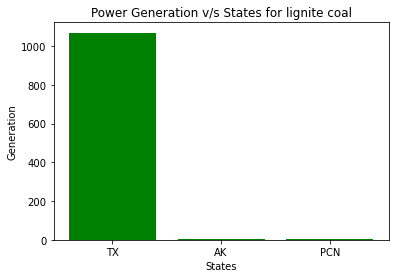

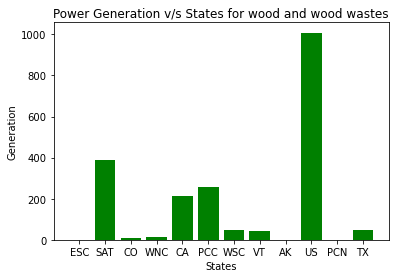

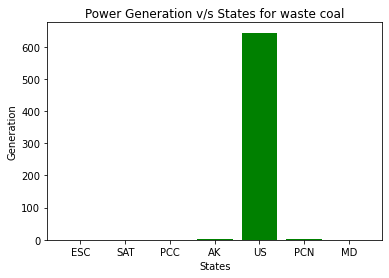

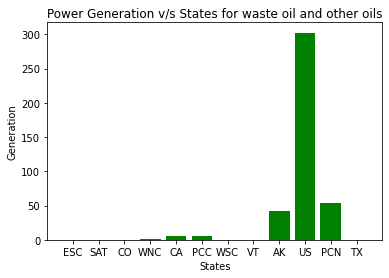

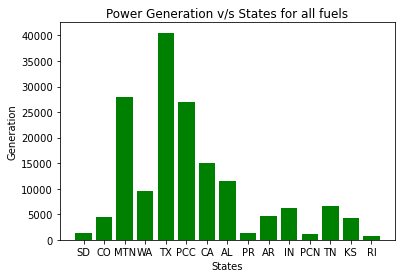

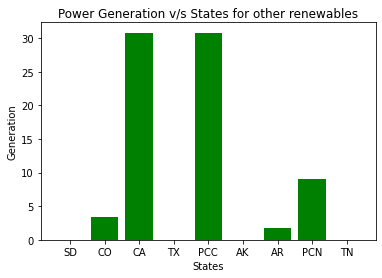

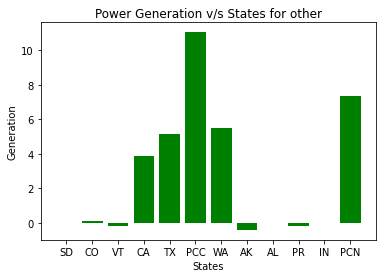

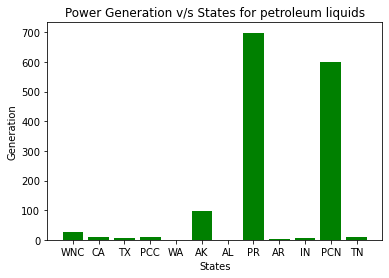

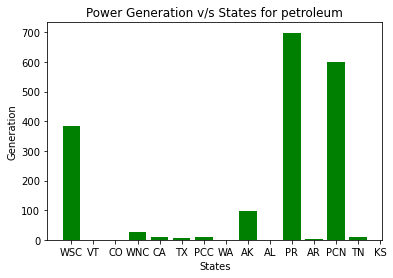

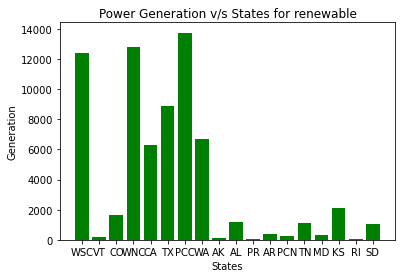

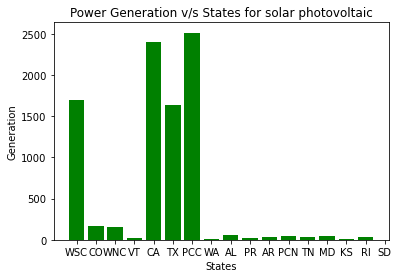

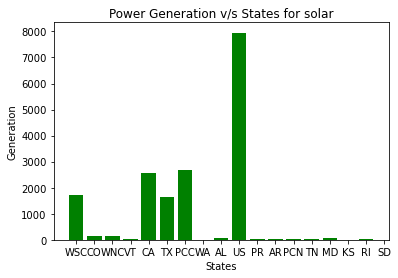

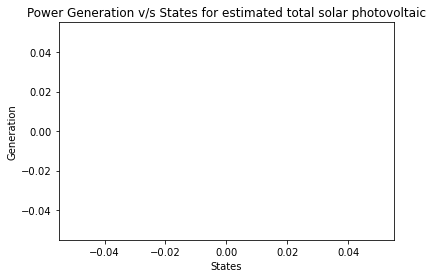

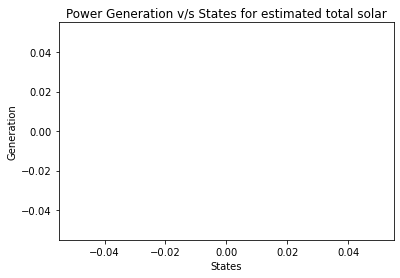

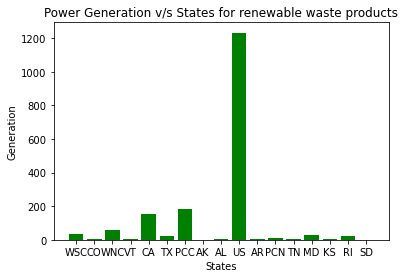

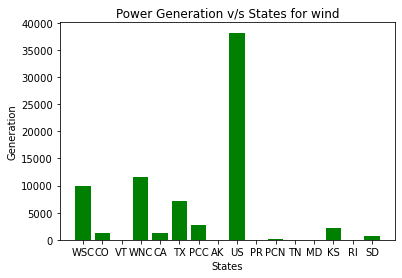

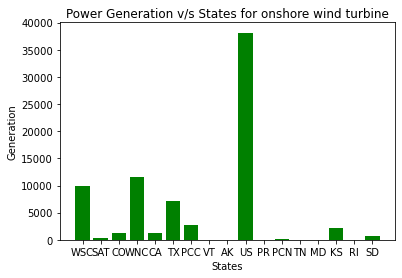

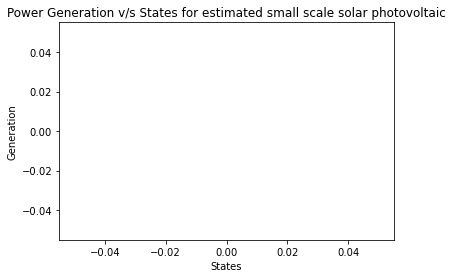

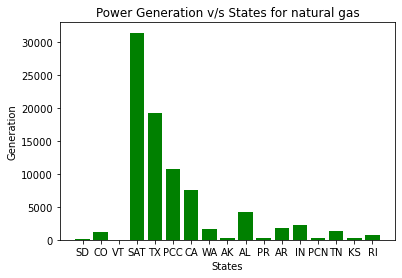

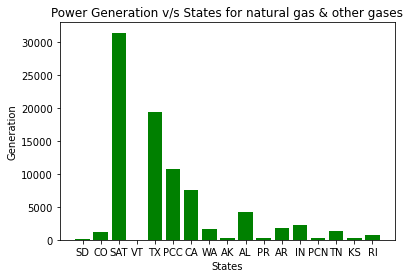

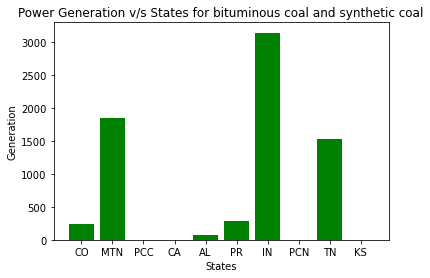

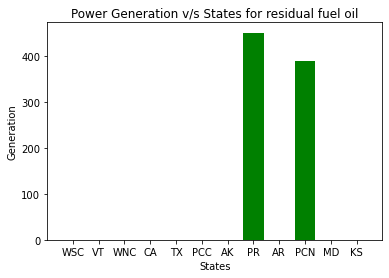

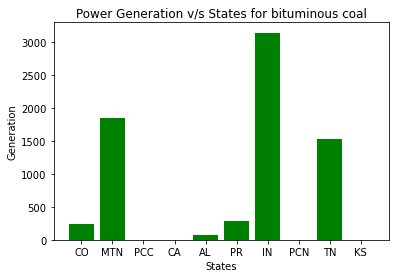

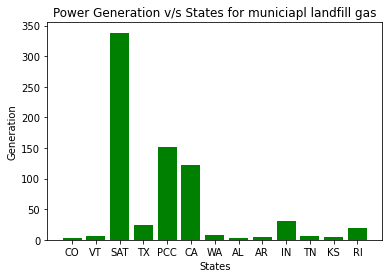

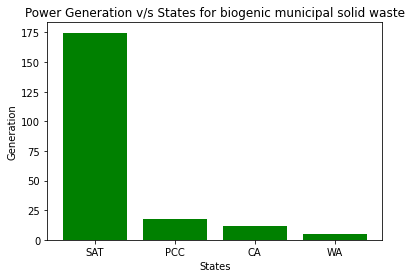

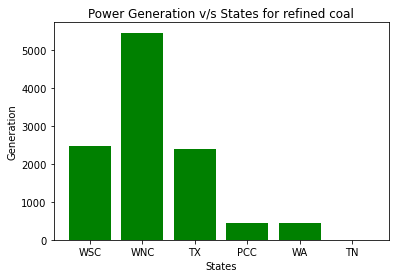

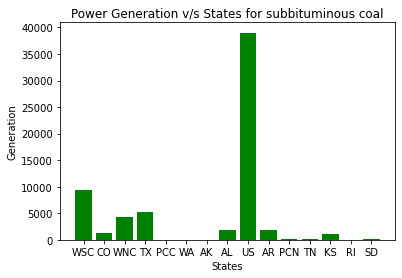

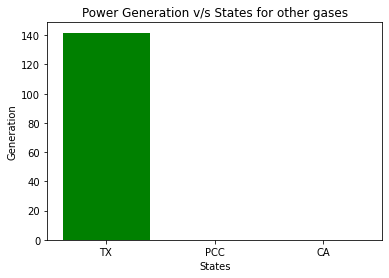

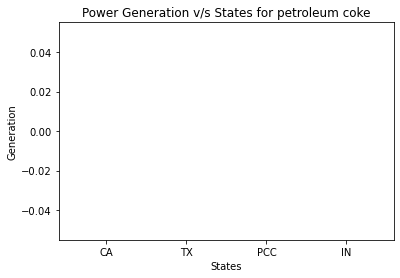

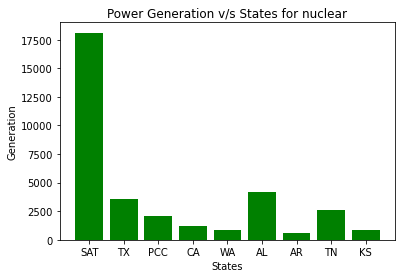

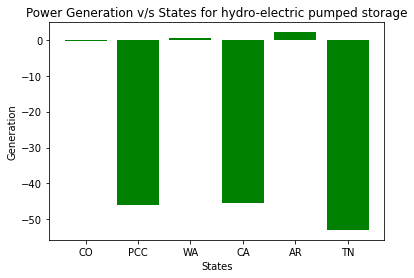

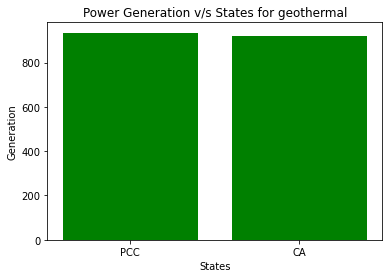

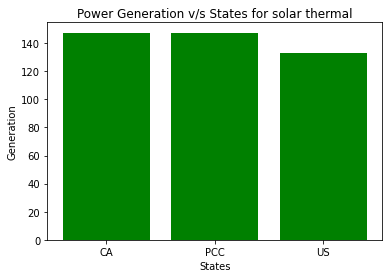

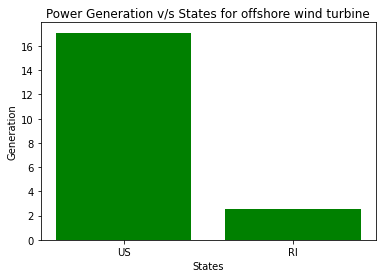

In [26]:
for fuel in df["fuelTypeDescription"].unique():
    states_generation = {}
    for i in range(0, 5000):
        if (
            df["sectorDescription"][i] == "Electric Power"
            and df["fuelTypeDescription"][i] == fuel
        ):
            states_generation[df["location"][i]] = df["generation"][i]
    plt.figure()
    plt.xlabel("States")
    plt.ylabel("Generation")
    plt.title("Power Generation v/s States for " + fuel)
    plt.bar(states_generation.keys(), states_generation.values(), color="g")

In [27]:
layout = dict(geo={"scope": "usa"})

In [28]:
layout

{'geo': {'scope': 'usa'}}

In [30]:
l = list(df["location"].unique())

In [37]:
data = dict(
    type="choropleth",
    locations=list(states_generation.keys()),
    locationmode="USA-states",
    z=list(states_generation.values()),
)

In [39]:
len(list(states_generation.values()))

15

In [53]:
# For All Renewables as the fuel type, ....
x = pg.Figure(data=[data], layout=layout)
x.update_layout(
    title="Power Generation in USA for all renewables as fuel type",
    font=dict(family="Courier New, monospace", size=18, color="RebeccaPurple"),
)
po.iplot(x)